In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2) 
data = adult.data.features.copy()
data['income'] = adult.data.targets

# Просмотр первых 5 строк датасета
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [3]:
data.shape

(48842, 15)

In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Обработка пропусков в данных

In [6]:
data_new_1 = data.dropna(axis=1, how='any') # удалили столбцы
(data.shape, data_new_1.shape)

((48842, 15), (48842, 12))

In [7]:
data_new_2 = data.dropna(axis=0, how='any') # удалили строки
(data.shape, data_new_2.shape)

((48842, 15), (47621, 15))

In [8]:
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
data_new_3 = data.fillna(0)
data_new_3.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# "Внедрение значений" - импьютация (imputation)

## Обработка пропусков в категориальных данных

In [ ]:
from sklearn.impute import SimpleImputer

In [511]:
# Загрузка датасета
data = pd.read_csv('dirty_data.csv', sep=",")

# Просмотр первых 5 строк датасета
print(data.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [15]:
total_count = data.shape[0]

# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка workclass. Тип данных object. Количество пустых значений 2799, 5.73%.
Колонка occupation. Тип данных object. Количество пустых значений 2809, 5.75%.
Колонка native-country. Тип данных object. Количество пустых значений 857, 1.75%.


In [16]:
cat_temp_data = data[['workclass']]
cat_temp_data.head(5)

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private


In [17]:
cat_temp_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
cat_temp_data[cat_temp_data['workclass'].isnull()].shape

(2799, 1)

In [22]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['State-gov'],
       ['Self-emp-not-inc'],
       ['Private'],
       ...,
       ['Private'],
       ['Private'],
       ['Self-emp-inc']], shape=(48842, 1), dtype=object)

In [23]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [24]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['State-gov'],
       ['Self-emp-not-inc'],
       ['Private'],
       ...,
       ['Private'],
       ['Private'],
       ['Self-emp-inc']], shape=(48842, 1), dtype=object)

In [25]:
np.unique(data_imp3)

array(['Federal-gov', 'Local-gov', 'NA', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [26]:
data_imp3[data_imp3=='NA'].size

2799

# Преобразование категориальных признаков в числовые

In [27]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
48837,Private
48838,Private
48839,Private
48840,Private


# Кодирование категорий целочисленными значениями (label encoding)

# Использование LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder
cat_enc['c1'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [29]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
le.classes_

array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [30]:
cat_enc_le

array([6, 5, 3, ..., 3, 3, 4], shape=(48842,))

In [31]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:
le.inverse_transform([0, 1, 2, 3, 5, 6, 7])

array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object)

## Использование OrdinalEncoder

In [33]:
from sklearn.preprocessing import OrdinalEncoder
data_oe = data[['workclass', 'occupation', 'native-country']]
data_oe.head()

,workclass,occupation,native-country
0,State-gov,Adm-clerical,United-States
1,Self-emp-not-inc,Exec-managerial,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Handlers-cleaners,United-States
4,Private,Prof-specialty,Cuba


In [34]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['State-gov', 'Adm-clerical', 'United-States'],
       ['Self-emp-not-inc', 'Exec-managerial', 'United-States'],
       ['Private', 'Handlers-cleaners', 'United-States'],
       ...,
       ['Private', 'Prof-specialty', 'United-States'],
       ['Private', 'Adm-clerical', 'United-States'],
       ['Self-emp-inc', 'Exec-managerial', 'United-States']],
      shape=(48842, 3), dtype=object)

In [35]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 7.,  0., 39.],
       [ 6.,  3., 39.],
       [ 4.,  5., 39.],
       ...,
       [ 4., 10., 39.],
       [ 4.,  0., 39.],
       [ 5.,  3., 39.]], shape=(48842, 3))

In [36]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [37]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [38]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41.])

In [39]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Federal-gov', 'Local-gov', 'NA', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
       dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'NA',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
        'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
        'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
        'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
        'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
        'NA', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru',
        'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland',
        'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'Un

In [40]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['State-gov', 'Adm-clerical', 'United-States'],
       ['Self-emp-not-inc', 'Exec-managerial', 'United-States'],
       ['Private', 'Handlers-cleaners', 'United-States'],
       ...,
       ['Private', 'Prof-specialty', 'United-States'],
       ['Private', 'Adm-clerical', 'United-States'],
       ['Self-emp-inc', 'Exec-managerial', 'United-States']],
      shape=(48842, 3), dtype=object)

# Масштабирование данных

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# MinMax масштабирование

In [44]:
# Используется для приведения значений признаков (или столбцов) к единому диапазону
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['fnlwgt']])

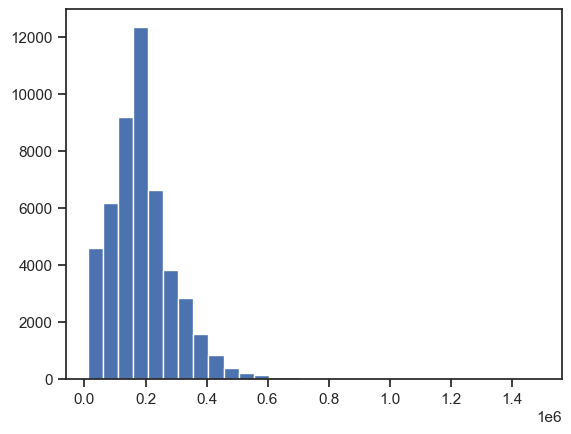

In [45]:
plt.hist(data['fnlwgt'], 30)
plt.show()

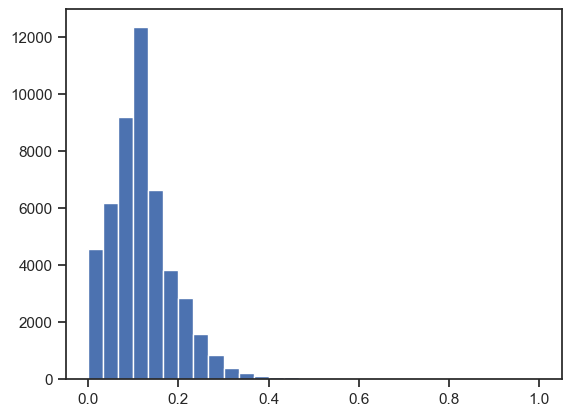

In [46]:
plt.hist(sc1_data, 30)
plt.show()

In [47]:
# В отличие от Минмакс масштабирования, которое приводит все значения к одному фиксированному диапазону (обычно от 0 до 1), 
# стандартизация использует статистику данных, а именно среднее и стандартное отклонение.
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['fnlwgt']])




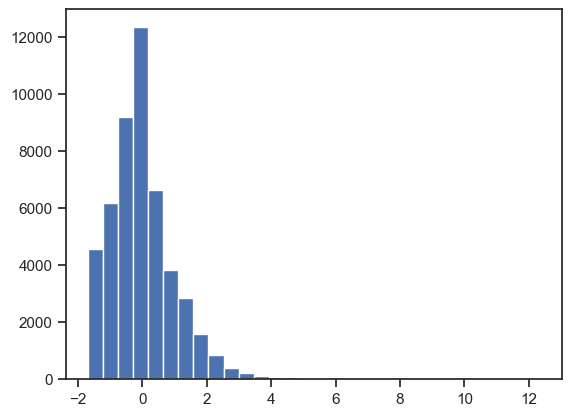

In [48]:
plt.hist(sc2_data, 30)
plt.show()